In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset hasil feature + label
df = pd.read_csv('../data/rfm_features_train.csv')
labels = pd.read_csv('../data/repeat_order_labels.csv')

# Merge
data = df.merge(labels[['customer_unique_id', 'repeat_order']], on='customer_unique_id')
X = data[['recency', 'frequency', 'monetary']]
y = data['repeat_order']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Normalisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test)

xgb = XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test)

C:\Users\Gede Darmawan\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Gede Darmawan\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Gede Darmawan\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [21:56:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [39]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== {model_name} ===")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred):.4f}")

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")



=== Logistic Regression ===
[[8392 6507]
 [  28  449]]
              precision    recall  f1-score   support

           0       1.00      0.56      0.72     14899
           1       0.06      0.94      0.12       477

    accuracy                           0.57     15376
   macro avg       0.53      0.75      0.42     15376
weighted avg       0.97      0.57      0.70     15376

ROC AUC Score: 0.7523

=== Random Forest ===
[[14899     0]
 [  437    40]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     14899
           1       1.00      0.08      0.15       477

    accuracy                           0.97     15376
   macro avg       0.99      0.54      0.57     15376
weighted avg       0.97      0.97      0.96     15376

ROC AUC Score: 0.5419

=== XGBoost ===
[[14899     0]
 [  475     2]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     14899
           1       1.00      0.00  

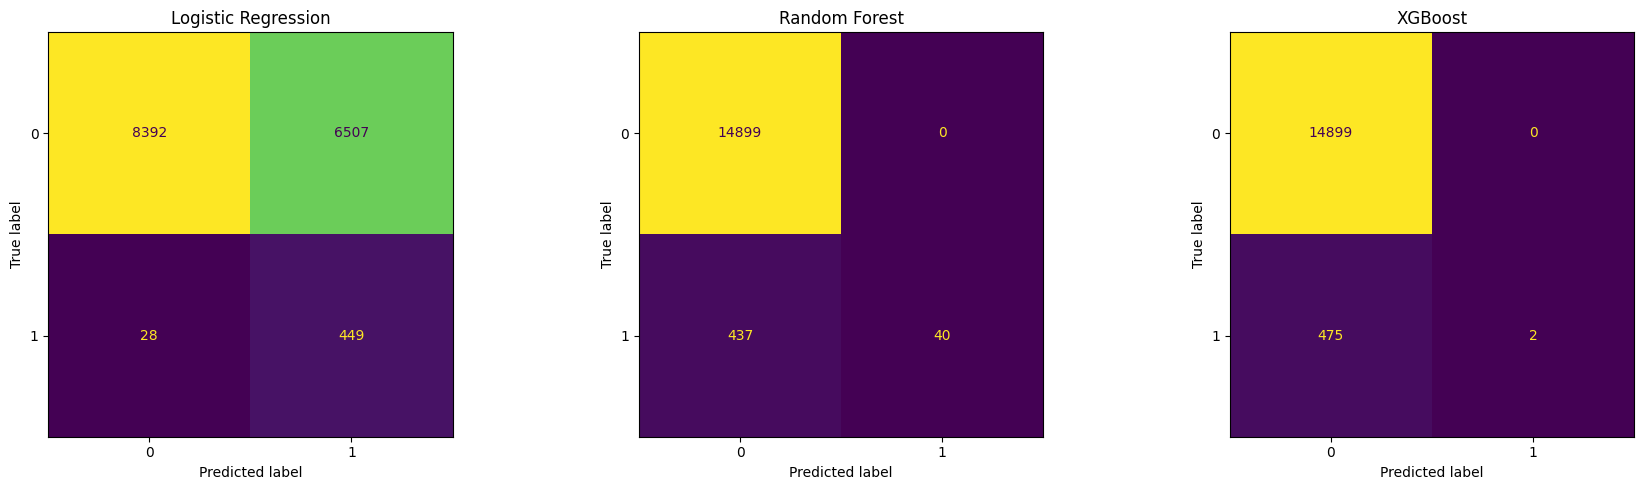

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (y_pred, title) in enumerate(zip(
    [y_pred_lr, y_pred_rf, y_pred_xgb],
    ['Logistic Regression', 'Random Forest', 'XGBoost']
)):
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[i], colorbar=False)
    axes[i].set_title(title)

plt.tight_layout()
plt.show()
